# Import necessary libraries

In [44]:
import quandl

import pandas as pd

import numpy as np

from fbprophet import Prophet

# matplotlib pyplot for plotting
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

# stocker library
from stocker import Stocker

# set api key
quandl.ApiConfig.api_key = "sY8rR9LTz4kT5z2cs94v"

# Read in the data
Read the data in from the quandl api for python and then set the index to the 'date' column. We are also parsing dates in the data file.

In [45]:
# L&T Finance Holdings data
stock_ltfh_df = quandl.get('NSE/LTFH')
stock_ltfh_df = stock_ltfh_df.reset_index(level=0)

# Motherson Sumi Data
stock_mothersumi_df = quandl.get('NSE/MOTHERSUMI')
stock_mothersumi_df = stock_mothersumi_df.reset_index(level=0)

# Anantraj Ltd. Data
stock_anantraj_df = quandl.get('NSE/ANANTRAJ')
stock_anantraj_df = stock_anantraj_df.reset_index(level=0)


In [46]:
stock_anantraj_df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2811,2018-02-01,67.00,68.25,66.00,66.25,66.45,1440628.0,969.27
2812,2018-02-02,65.00,65.00,58.15,58.35,58.80,2130465.0,1301.19
2813,2018-02-05,57.00,59.00,55.10,58.55,58.25,1653116.0,946.27
2814,2018-02-06,54.75,56.70,53.05,56.30,55.75,2090546.0,1154.77
2815,2018-02-07,56.90,58.80,56.60,57.10,57.20,1433367.0,826.88


# Prepare for Prophet
For prophet to work, we need to change the names of these columns to 'ds' and 'y', so lets just create a new dataframe and keep our old one handy. The new dataframe will initially be created with an integer index so we can rename the columns

In [47]:
stock_ltfh_df = stock_ltfh_df.rename(columns={'Date':'ds', 'Close':'y'})

stock_mothersumi_df = stock_mothersumi_df.rename(columns={'Date':'ds', 'Close':'y'})

stock_anantraj_df = stock_anantraj_df.rename(columns={'Date':'ds', 'Close':'y'})

# verifying just to make sure
stock_anantraj_df.tail()

,ds,Open,High,Low,Last,y,Total Trade Quantity,Turnover (Lacs)
2811,2018-02-01,67.00,68.25,66.00,66.25,66.45,1440628.0,969.27
2812,2018-02-02,65.00,65.00,58.15,58.35,58.80,2130465.0,1301.19
2813,2018-02-05,57.00,59.00,55.10,58.55,58.25,1653116.0,946.27
2814,2018-02-06,54.75,56.70,53.05,56.30,55.75,2090546.0,1154.77
2815,2018-02-07,56.90,58.80,56.60,57.10,57.20,1433367.0,826.88



Now's a good time to take a look at our data. Plotting the data using pandas' plot function

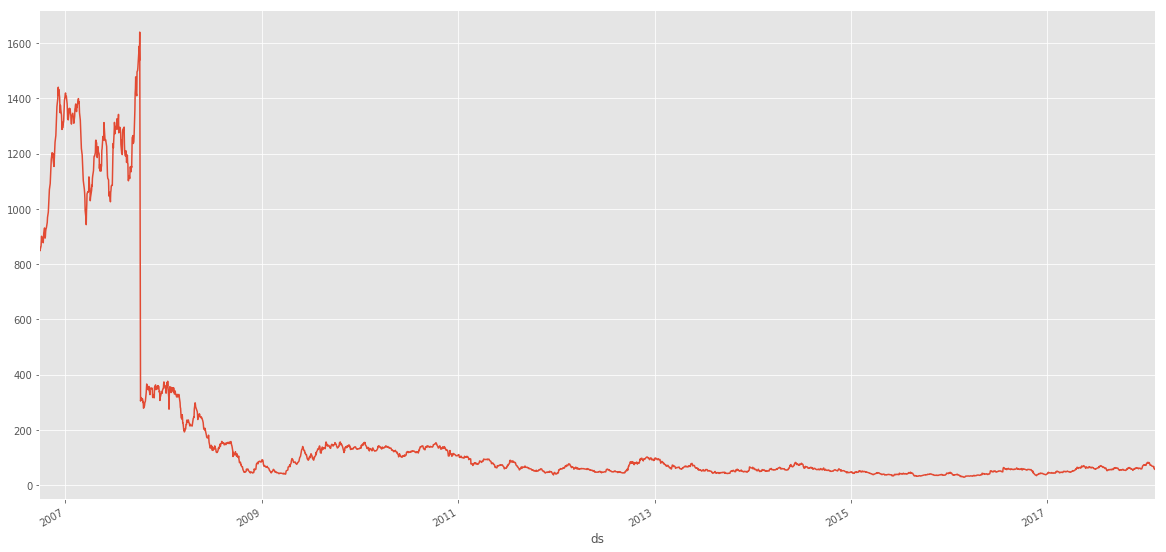

In [48]:
stock_anantraj_df.set_index('ds').y.plot()

Facebook prophet's example uses the log-transform as a way to remove some of these anomolies but it isn't the absolute 'best' way to do this...but given that its the example and a simple data series, We follow their lead for now. Taking the log of a number is easily reversible to be able to see your original data.

To log-transform your data, you can use numpy's log() function

In [49]:
stock_anantraj_df['y_orig'] = stock_anantraj_df['y']


In [50]:
stock_anantraj_df['y'] = np.log(stock_anantraj_df['y'])


In [51]:
stock_anantraj_df.tail()

,ds,Open,High,Low,Last,y,Total Trade Quantity,Turnover (Lacs),y_orig
2811,2018-02-01,67.00,68.25,66.00,66.25,4.196450,1440628.0,969.27,66.45
2812,2018-02-02,65.00,65.00,58.15,58.35,4.074142,2130465.0,1301.19,58.80
2813,2018-02-05,57.00,59.00,55.10,58.55,4.064744,1653116.0,946.27,58.25
2814,2018-02-06,54.75,56.70,53.05,56.30,4.020877,2090546.0,1154.77,55.75
2815,2018-02-07,56.90,58.80,56.60,57.10,4.046554,1433367.0,826.88,57.20


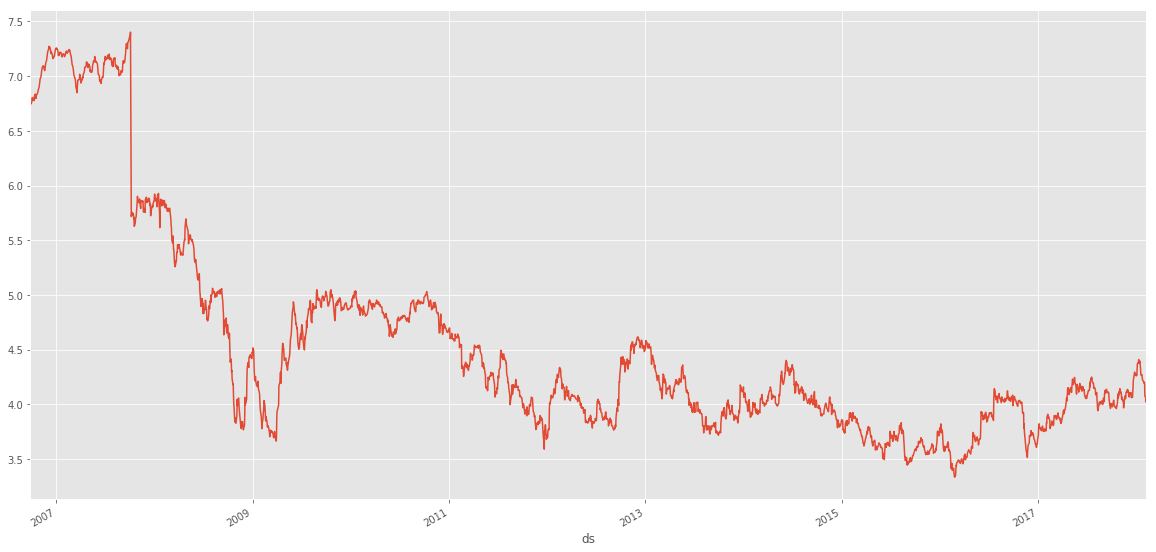

In [52]:
stock_anantraj_df.set_index('ds').y.plot()


# Running Prophet
Now, let's set prophet up to begin modeling our data.

Note: Since we are using daily data, you'll see a message from Prophet saying Disabling daily seasonality. Run prophet with daily_seasonality=True to override this. This is OK since we are working with daily data but you can disable it by using daily_seasonality=True in the instantiation of Prophet.

In [53]:
model = Prophet()

model.fit(stock_anantraj_df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecasting is fairly useless unless you can look into the future, so we need to add some future dates to our dataframe. For this example, I want to forecast 2 months into the future, so I'll built a future dataframe with 60 periods since we are working with daily data.

This can be done with the following code:



In [54]:
future_data = model.make_future_dataframe(periods = 365)

In [55]:
forecast_data = model.predict(future_data)
forecast_data.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
3176,2019-02-03,4.502058,3.699258,5.356576,3.833300,5.539583,0.131908,0.131908,0.131908,0.131908,0.131908,0.131908,0.151645,0.151645,0.151645,-0.019737,-0.019737,-0.019737,4.633966
3177,2019-02-04,4.502808,3.696495,5.360014,3.636854,5.348660,-0.048307,-0.048307,-0.048307,-0.048307,-0.048307,-0.048307,-0.026610,-0.026610,-0.026610,-0.021697,-0.021697,-0.021697,4.454501
3178,2019-02-05,4.503558,3.694450,5.363452,3.679334,5.339504,-0.048897,-0.048897,-0.048897,-0.048897,-0.048897,-0.048897,-0.025359,-0.025359,-0.025359,-0.023538,-0.023538,-0.023538,4.454661
3179,2019-02-06,4.504308,3.692405,5.366890,3.625435,5.344819,-0.050708,-0.050708,-0.050708,-0.050708,-0.050708,-0.050708,-0.025435,-0.025435,-0.025435,-0.025273,-0.025273,-0.025273,4.453600
3180,2019-02-07,4.505059,3.690270,5.370328,3.598742,5.302507,-0.051127,-0.051127,-0.051127,-0.051127,-0.051127,-0.051127,-0.024209,-0.024209,-0.024209,-0.026918,-0.026918,-0.026918,4.453931


We really only want to look at yhat, yhat_lower and yhat_upper, here yhat is the forecasted value, yhat_upper and yhat_lower are the uncertainity levels(upper and lower bounds) respectively, so we can do that with:

In [56]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3176,2019-02-03,4.633966,3.833300,5.539583
3177,2019-02-04,4.454501,3.636854,5.348660
3178,2019-02-05,4.454661,3.679334,5.339504
3179,2019-02-06,4.453600,3.625435,5.344819
3180,2019-02-07,4.453931,3.598742,5.302507



# Plotting Prophet results
Prophet has a plotting mechanism called plot. This plot functionality draws the original data (black dots), the model (blue line) and the error of the forecast (shaded blue area).

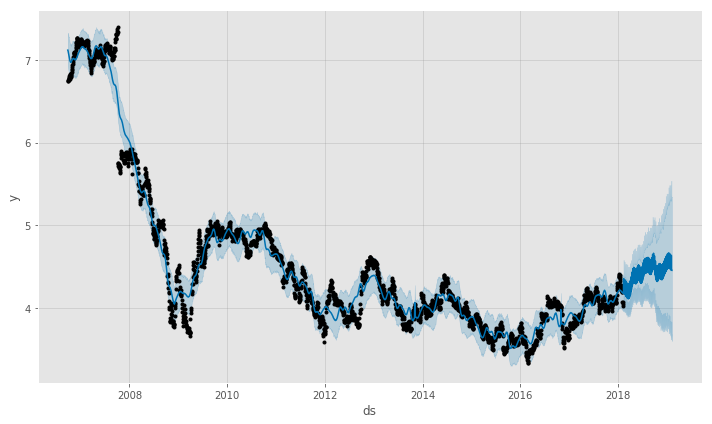

In [57]:
model.plot(forecast_data);

# Visualizing Prophet models
In order to build a useful dataframe to visualize our model versus our original data, we need to combine the output of the Prophet model with our original data set, then we'll build a new chart manually using pandas and matplotlib.

First, let's set our dataframes to have the same index of ds

In [58]:
stock_anantraj_df.set_index('ds', inplace=True)
forecast_data.set_index('ds', inplace=True)


Now, we'll combine the original data and our forecast model data

In [59]:
combined_df = stock_anantraj_df.join(forecast_data[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

In [60]:
combined_df.tail()

,Open,High,Low,Last,y,Total Trade Quantity,Turnover (Lacs),y_orig,yhat,yhat_lower,yhat_upper
ds,,,,,,,,,,,
2019-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.633966,3.833300,5.539583
2019-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.454501,3.636854,5.348660
2019-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.454661,3.679334,5.339504
2019-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.453600,3.625435,5.344819
2019-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.453931,3.598742,5.302507


In [61]:
combined_df['yhat_rescaled'] = np.exp(combined_df['yhat'])


In [62]:
combined_df.head()

,Open,High,Low,Last,y,Total Trade Quantity,Turnover (Lacs),y_orig,yhat,yhat_lower,yhat_upper,yhat_rescaled
ds,,,,,,,,,,,,
2006-09-27,860.50,860.50,860.50,860.50,6.757514,300.0,2.58,860.50,7.120805,6.925605,7.328794,1237.445608
2006-09-28,877.75,877.75,843.30,847.00,6.742409,31720.0,276.18,847.60,7.116554,6.910640,7.330496,1232.197245
2006-09-29,848.05,857.75,833.10,849.95,6.743765,1432.0,12.16,848.75,7.111128,6.897201,7.329343,1225.528865
2006-10-03,855.00,865.75,850.00,865.75,6.763596,1774.0,15.29,865.75,7.076615,6.864435,7.285087,1183.953948
2006-10-04,883.10,883.10,865.05,883.10,6.783438,27084.0,238.96,883.10,7.067302,6.855797,7.276873,1172.978479


Let's take a look at the original prices and yhat_rescaled data(the predicted prices) together in a chart.

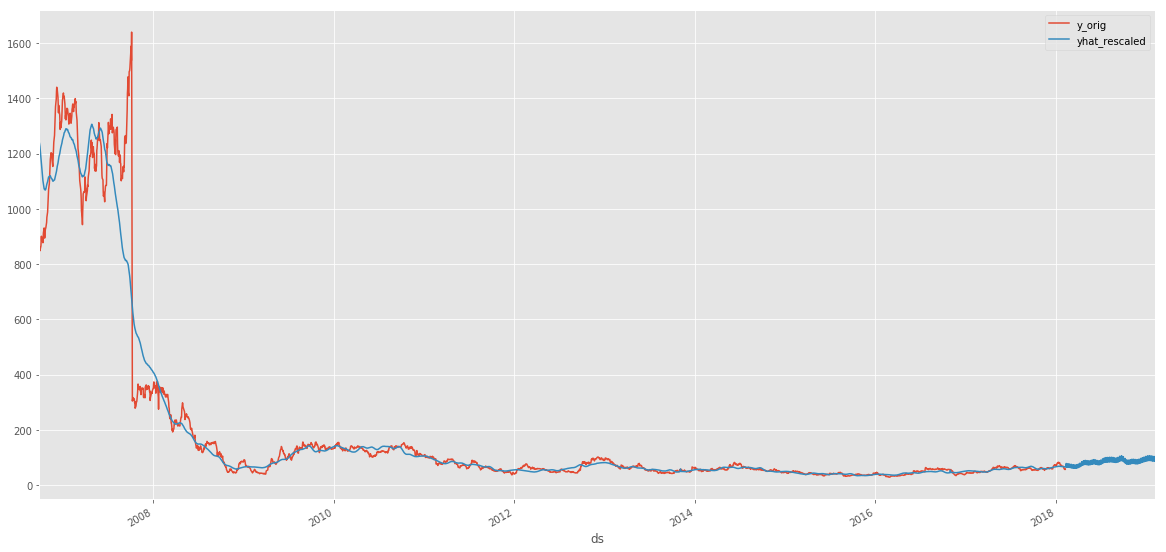

In [63]:
combined_df[['y_orig','yhat_rescaled']].plot()

You can see from the chart that the model (blue) is pretty good when plotted against the actual signal (orange). To make it even better, we'll need to go back to our original stock_ltfh_df and forecast_data dataframes.

First things first - we need to find the 2nd to last date of the original prices data in stock_ltfh_df in order to ensure the original prices data and model data charts are connected.

In [64]:
stock_anantraj_df.index = pd.to_datetime(stock_anantraj_df.index) #make sure our index as a datetime object
connect_date = stock_anantraj_df.index[-2] #select the 2nd to last date


Using the connect_date we can now grab only the model data that after that date. To do this, we'll mask the forecast data.

In [65]:
mask = (forecast_data.index > connect_date)
prediction_df = forecast_data.loc[mask]

In [66]:
prediction_df.tail()

,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2019-02-03,4.502058,3.699258,5.356576,3.833300,5.539583,0.131908,0.131908,0.131908,0.131908,0.131908,0.131908,0.151645,0.151645,0.151645,-0.019737,-0.019737,-0.019737,4.633966
2019-02-04,4.502808,3.696495,5.360014,3.636854,5.348660,-0.048307,-0.048307,-0.048307,-0.048307,-0.048307,-0.048307,-0.026610,-0.026610,-0.026610,-0.021697,-0.021697,-0.021697,4.454501
2019-02-05,4.503558,3.694450,5.363452,3.679334,5.339504,-0.048897,-0.048897,-0.048897,-0.048897,-0.048897,-0.048897,-0.025359,-0.025359,-0.025359,-0.023538,-0.023538,-0.023538,4.454661
2019-02-06,4.504308,3.692405,5.366890,3.625435,5.344819,-0.050708,-0.050708,-0.050708,-0.050708,-0.050708,-0.050708,-0.025435,-0.025435,-0.025435,-0.025273,-0.025273,-0.025273,4.453600
2019-02-07,4.505059,3.690270,5.370328,3.598742,5.302507,-0.051127,-0.051127,-0.051127,-0.051127,-0.051127,-0.051127,-0.024209,-0.024209,-0.024209,-0.026918,-0.026918,-0.026918,4.453931


Now, let's build a dataframe to use in our new visualization. We'll follow the same steps we did before.

In [67]:
combined_df = stock_anantraj_df.join(prediction_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

In [68]:
combined_df['yhat_rescaled'] = np.exp(combined_df['yhat'])
combined_df['yhat_upper_rescaled'] = np.exp(combined_df['yhat_upper'])
combined_df['yhat_lower_rescaled'] = np.exp(combined_df['yhat_lower'])

# Time to plot
Now, let's plot everything to get the 'final' visualization of our stock price data and forecast with errors.

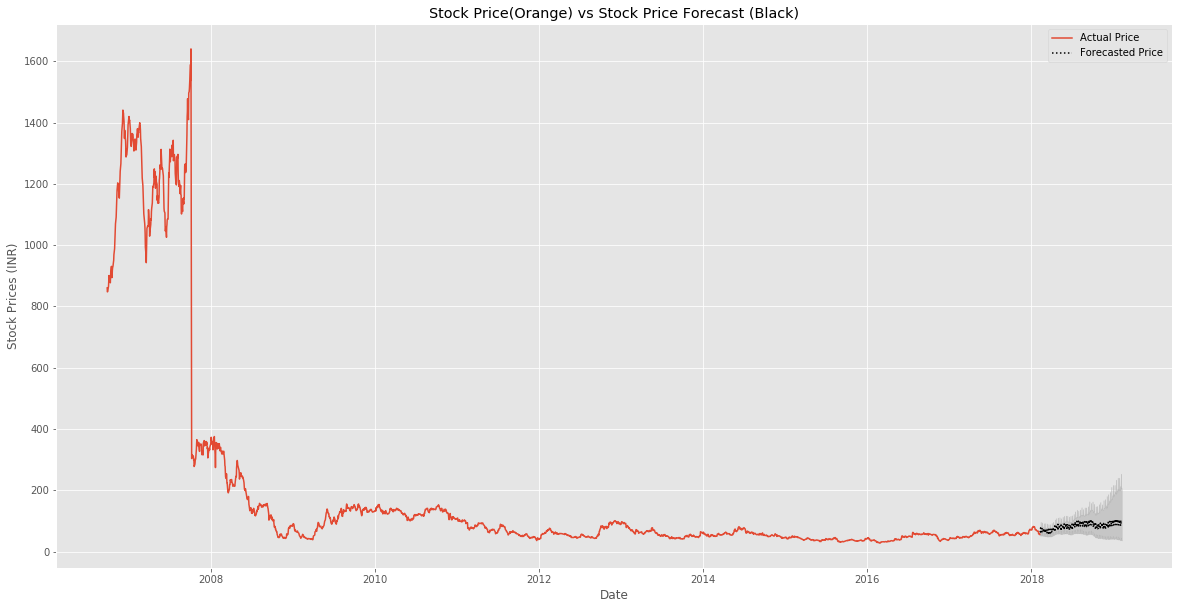

In [69]:
fig, ax1 = plt.subplots()
ax1.plot(combined_df.y_orig)
ax1.plot(combined_df.yhat_rescaled, color='black', linestyle=':')
ax1.fill_between(combined_df.index, np.exp(combined_df['yhat_upper']), np.exp(combined_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Stock Price(Orange) vs Stock Price Forecast (Black)')
ax1.set_ylabel('Stock Prices (INR)')
ax1.set_xlabel('Date')

L=ax1.legend() #get the legend
L.get_texts()[0].set_text('Actual Price') #change the legend text for 1st plot
L.get_texts()[1].set_text('Forecasted Price') #change the legend text for 2nd plot

In [70]:
combined_df.tail(60)

,Open,High,Low,Last,y,Total Trade Quantity,Turnover (Lacs),y_orig,yhat,yhat_lower,yhat_upper,yhat_rescaled,yhat_upper_rescaled,yhat_lower_rescaled
ds,,,,,,,,,,,,,,
2018-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.391077,3.734366,5.050626,80.727328,156.120177,41.861495
2018-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.396547,3.745626,5.067473,81.170123,158.772608,42.335506
2018-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.400616,3.789265,5.091310,81.501087,162.602810,44.223873
2018-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.405898,3.716808,5.119937,81.932711,167.324806,41.132903
2018-12-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.410796,3.733197,5.082760,82.334994,161.218354,41.812559
2018-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.411150,3.746303,5.094366,82.364101,163.100414,42.364151
2018-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.593302,3.941775,5.272506,98.820187,194.903718,51.509957
2018-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.418685,3.735746,5.132364,82.987104,169.417220,41.919298
2018-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.423477,3.777337,5.092553,83.385697,162.804903,43.699526
